## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial




In [ ]:
df_new = pd.read_csv('/content/train.csv')
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
#to see data frame better we can change column width or remove column width limit(by setting -1), because long questions have been cut(stackoverflow)

pd.set_option('display.max_colwidth', -1)

<ipython-input-4-00fc50ba3482>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
df_new.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


### Exploration

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [ ]:
df_new.shape

(404290, 6)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df = df_new.copy()

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
#remove rows with null value
df.dropna(axis=0 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [ ]:
# 'question1' and 'question2'columns data type are object and we should change them to string
df['question1'] = df['question1'].astype(str)
df['question2'] = df['question2'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


#### * It is a binary classification problem, for a given pair of questions we need to predict if they are duplicates or not

#### * our target is binary, 0 for not repeated question and 1 for repeated question

0    255024
1    149263
Name: is_duplicate, dtype: int64
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


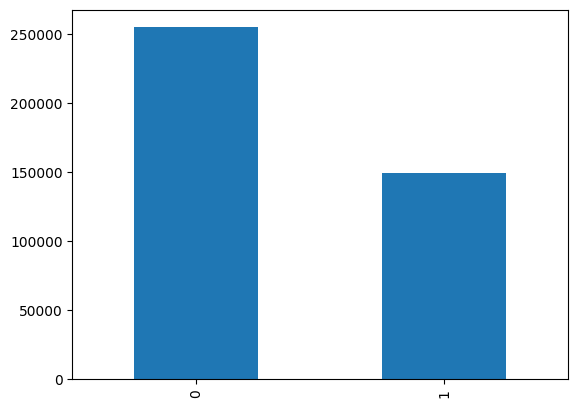

In [ ]:
# 'is_duplicate' is our label or target
#duplicate and non-duplicate questions count
print(df['is_duplicate'].value_counts())

#duplicate and non-duplicate questions percent
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

#the distribution of the target bar chart
df['is_duplicate'].value_counts().plot(kind='bar')
plt.show()


#### * our target is some how inbalanced

In [ ]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Total Number of questions',qid.shape[0])
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Total Number of questions 808574
Number of unique questions 537929
Number of questions getting repeated 111778


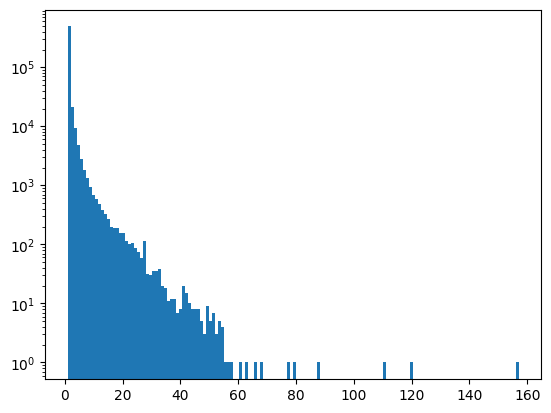

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=150)
plt.yscale('log')
plt.show()

### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [ ]:
# 'question1' and 'question2'columns data type are object and we should change them to string
df['question1'] = df['question1'].astype(str)
df['question1'] = df['question1'].astype(str)


In [ ]:
# duplicate rows
df.duplicated().sum()

0

In [ ]:
# to do preprocessing we Import nltk package
# nltk.download()
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#this is as stretch work for future
#function for handling contractions
def text_preprocess(ques):
    ques = str(ques).lower().strip()

    ques = ques.replace('%',' percent')
    ques = ques.replace('$',' dollar ')
    ques = ques.replace('₹', ' rupee ')
    ques = ques.replace('€', ' euro ')
    ques = ques.replace('@', ' at ')
    ques = ques.replace('[math]','')
    ques = ques.replace(',000,000,000 ', 'b ')
    ques = ques.replace(',000,000 ', 'm ')
    ques = ques.replace(',000 ', 'k ')
    ques = re.sub(r'([0-9]+)000000000', r'\1b', ques)
    ques = re.sub(r'([0-9]+)000000', r'\1m', ques)
    ques = re.sub(r'([0-9]+)000', r'\1k', ques)
    # Decontract words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953

    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    decontracted_ques = []

    for word in ques.split():
      if word in contractions:
        word = contractions[word]
      decontracted_ques.append(word)
    
    ques = ' '.join(decontracted_ques)
    ques = ques.replace("'ve", " have")
    ques = ques.replace("n't", " not")
    ques = ques.replace("'re", " are")
    ques = ques.replace("'ll", " will")
    ques = re.sub(r"[^A-Za-z0-9]", " ", ques)
    ques = re.sub('[,\.\(\)?"\']'," ",ques)
    ques = re.sub(r"what's", "", ques)
    ques = re.sub(r"What's", "", ques)
    ques = re.sub(r"\'s", " ", ques)
    ques = re.sub(r"\'ve", " have ", ques)
    ques = re.sub(r"can't", "cannot ", ques)
    ques = re.sub(r"n't", " not ", ques)
    ques = re.sub(r"I'm", "I am", ques)
    ques = re.sub(r" m ", " am ", ques)
    ques = re.sub(r"\'re", " are ", ques)
    ques = re.sub(r"\'d", " would ", ques)
    ques = re.sub(r"\'ll", " will ", ques)
    ques = re.sub(r"\0k ", "0000 ", ques)
    ques = re.sub(r" e g ", " eg ", ques)
    ques = re.sub(r" b g ", " bg ", ques)
    ques = re.sub(r"\0s", "0", ques)
    ques = re.sub(r" 9 11 ", "911", ques)
    ques = re.sub(r"e-mail", "email", ques)
    ques = re.sub(r"\s{2,}", " ", ques)
    ques = re.sub(r"quikly", "quickly", ques)
    ques = re.sub(r" usa ", " America ", ques)
    ques = re.sub(r" USA ", " America ", ques)
    ques = re.sub(r" u s ", " America ", ques)
    ques = re.sub(r" uk ", " England ", ques)
    ques = re.sub(r" UK ", " England ", ques)
    ques = re.sub(r"india", "India", ques)
    ques = re.sub(r"china", "China", ques)
    ques = re.sub(r"chinese", "Chinese", ques) 
    ques = re.sub(r"imrovement", "improvement", ques)
    ques = re.sub(r"intially", "initially", ques)
    ques = re.sub(r"quora", "Quora", ques)
    ques = re.sub(r" dms ", "direct messages ", ques)  
    ques = re.sub(r"demonitization", "demonetization", ques) 
    ques = re.sub(r"actived", "active", ques)
    ques = re.sub(r"kms", " kilometers ", ques)
    ques = re.sub(r"KMs", " kilometers ", ques)
    ques = re.sub(r" cs ", " computer science ", ques) 
    ques = re.sub(r" upvotes ", " up votes ", ques)
    ques = re.sub(r" iPhone ", " phone ", ques)
    ques = re.sub(r"\0rs ", " rs ", ques) 
    ques = re.sub(r"calender", "calendar", ques)
    ques = re.sub(r"ios", "operating system", ques)
    ques = re.sub(r"gps", "GPS", ques)
    ques = re.sub(r"gst", "GST", ques)
    ques = re.sub(r"programing", "programming", ques)
    ques = re.sub(r"bestfriend", "best friend", ques)
    ques = re.sub(r"dna", "DNA", ques)
    ques = re.sub(r"III", "3", ques) 
    ques = re.sub(r"the US", "America", ques)
    ques = re.sub(r"Astrology", "astrology", ques)
    ques = re.sub(r"Method", "method", ques)
    ques = re.sub(r"Find", "find", ques) 
    ques = re.sub(r"banglore", "Banglore", ques)
    ques = re.sub(r" J K ", " JK ", ques)

    # Eliminate HTML tags
    ques = BeautifulSoup(ques)
    ques = ques.get_text()

    # Remove punctuation characters
    pattern = re.compile('\W')
    ques = re.sub(pattern,' ',ques).strip()
    
    return ques

In [ ]:


#define a function for data preprocessing (its argument is data frame column) (we'll call it twice later, one for each column)
def data_prep(column):

    # Create a new column to store the cleaned data
    column_name = column.name + "_cleaned"
    df[column_name] = ""

    # loop iterating each row in the column
    for index, row in column.iteritems():
        
        # Split into words
        from nltk.tokenize import word_tokenize
        words = word_tokenize(row)

        # normalize case
        words = [word.lower() for word in words]

        # Remove punctuation
        import string
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in words]
        
        # Remove non-alphabetic tokens
        words = [word for word in stripped if word.isalpha()]

        # remove stop words
        ## NLTK stopwords is removing too many words, so we'll use their list but remove the ones that are too important
        from nltk.corpus import stopwords
        stop_words = set(stopwords.words('english'))

        # Remove stop words that are too important for our purpose
        # stop_words.remove('no')

        words = [w for w in words if not w in stop_words]

        # Stemming
        # from nltk.stem.porter import PorterStemmer
        # porter = PorterStemmer()
        # stemmed = [porter.stem(word) for word in words]

        # Alternative: Lemmatization
        from nltk.stem import WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        lemmatized = [lemmatizer.lemmatize(word) for word in words]



        # Join the words back into one string separated by space, and store in new column
        # df.at[index, column_name] = " ".join(stemmed)
        df.at[index, column_name] = " ".join(lemmatized)

In [ ]:
# apply data_prep function on 'question1' and 'question2' columns
data_prep(df['question1'])
data_prep(df['question2'])


<ipython-input-28-7bcf94d46dd4>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in column.iteritems():
<ipython-input-28-7bcf94d46dd4>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in column.iteritems():


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,step step guide invest share market india,step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,story kohinoor kohinoor diamond,would happen indian government stole kohinoor kohinoor diamond back
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,mentally lonely solve,find remainder math math divided
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,one dissolve water quikly sugar salt methane carbon di oxide,fish would survive salt water


In [ ]:
# Remove question marks from questions
df['question1'] = df['question1'].str.replace('?', '')
df['question2'] = df['question2'].str.replace('?', '')

<ipython-input-301-6ae39c81620a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['question1'] = df['question1'].str.replace('?', '')
<ipython-input-301-6ae39c81620a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['question2'] = df['question2'].str.replace('?', '')


In [ ]:
# Step above took a while, so let's save the results to a csv file
df.to_csv("train_cleaned.csv", index=False)

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [ ]:
# Ratio of words in one question that are also in the other question

# Create a new feature:number of words is common in 2 questions divided by len of first question. if none, return 0
df['ratio_words_q1'] = df.apply(lambda row: len(set(row['question1_cleaned'].split()).intersection(set(row['question2_cleaned'].split()))) / len(set(row['question1_cleaned'].split())) if len(set(row['question1_cleaned'].split())) > 0 else 0, axis=1)

# Create a new feature:number of words is common in 2 questions divided by len of second question. if none, return 0
df['ratio_words_q2'] = df.apply(lambda row: len(set(row['question2_cleaned'].split()).intersection(set(row['question1_cleaned'].split()))) / len(set(row['question2_cleaned'].split())) if len(set(row['question2_cleaned'].split())) > 0 else 0, axis=1)


In [ ]:
# Ratio of words in one question that are also in the other question (full question, not cleaned)

#Create a full_ratio_words_q1 column and full_ratio_words_q2 column.they are the ratio of common words to the length of full question (question1 & question2)
df['full_ratio_words_q1'] = df.apply(lambda row: len(set(row['question1'].split()).intersection(set(row['question2'].split()))) / len(set(row['question1'].split())) if len(set(row['question1'].split())) > 0 else 0, axis=1)
df['full_ratio_words_q2'] = df.apply(lambda row: len(set(row['question2'].split()).intersection(set(row['question1'].split()))) / len(set(row['question2'].split())) if len(set(row['question2'].split())) > 0 else 0, axis=1)


In [ ]:
## List of words that is in one question that are not in the other question

# Create a column with the words that are in question1 but not in question2
df['q1_not_q2'] = df.apply(lambda row: set(row['question1_cleaned'].split()).difference(set(row['question2_cleaned'].split())), axis=1)

# Create a column with the words that are in question2 but not in question1
df['q2_not_q1'] = df.apply(lambda row: set(row['question2_cleaned'].split()).difference(set(row['question1_cleaned'].split())), axis=1)

In [ ]:
## List of words in one question that are not in the other question (full question, not cleaned)

# Create a column with the wods that are in question1 but not in question2
df['full_q1_not_q2'] = df.apply(lambda row: set(row['question1'].split()).difference(set(row['question2'].split())), axis=1)

# Create a column with the wods that are in question2 but not in question1
df['full_q2_not_q1'] = df.apply(lambda row: set(row['question2'].split()).difference(set(row['question1'].split())), axis=1)

In [ ]:
# Create a column with the number of words in question1 and question2
df['q1_words'] = df.apply(lambda row: len(row['question1'].split()), axis=1)

df['q2_words'] = df.apply(lambda row: len(row['question2'].split()), axis=1)

In [ ]:
# Let's see a sample of the data where ratio_words_q1 is over 0.8 and ratio_words_q2 is over 0.8 and is_duplicate is 0
pd.set_option('display.max_colwidth', 100)
df[(df['ratio_words_q1'] > 0.8) & (df['ratio_words_q2'] > 0.8) & (df['is_duplicate'] == 0)].sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,ratio_words_q1,ratio_words_q2,full_ratio_words_q1,full_ratio_words_q2,q1_not_q2,q2_not_q1,full_q1_not_q2,full_q2_not_q1,q1_words,q2_words
220305,220305,265969,327380,What are some things new employees should know going into their first day at Spectrum Pharmaceut...,What are some things new employees should know going into their first day at Lexicon Pharmaceuti...,0,thing new employee know going first day spectrum pharmaceutical,thing new employee know going first day lexicon pharmaceutical,0.888889,0.888889,0.937500,0.937500,{spectrum},{lexicon},{Spectrum},{Lexicon},16,16
210120,210120,314581,71325,What are the strongest majors in terms of job prospects and what are the weakest majors at Phila...,What are the strongest majors in terms of job prospects and what are the weakest majors at Buckn...,0,strongest major term job prospect weakest major philadelphia university,strongest major term job prospect weakest major bucknell university,0.875000,0.875000,0.937500,0.937500,{philadelphia},{bucknell},{Philadelphia},{Bucknell},19,19
187652,187652,285960,285961,What branch can I get in SRM main campus?,What branch can I get in the SRM main campus with a 16k rank?,0,branch get srm main campus,branch get srm main campus rank,1.000000,0.833333,0.888889,0.571429,{},{rank},{campus?},"{16k, rank?, the, campus, with, a}",9,14
209816,209816,314197,314198,"What is the ""10-58"" police code?","What is the ""10-81"" police code?",0,police code,police code,1.000000,1.000000,0.833333,0.833333,{},{},"{""10-58""}","{""10-81""}",6,6
96660,96660,160975,160976,Why are people insecure?,What are insecure people?,0,people insecure,insecure people,1.000000,1.000000,0.250000,0.250000,{},{},"{insecure?, people, Why}","{people?, What, insecure}",4,4


<ipython-input-38-f762faa2d37d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['ratio_words_q1'], label='Not Duplicate')
<ipython-input-38-f762faa2d37d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1]['ratio_words_q1'], label='Duplicate'

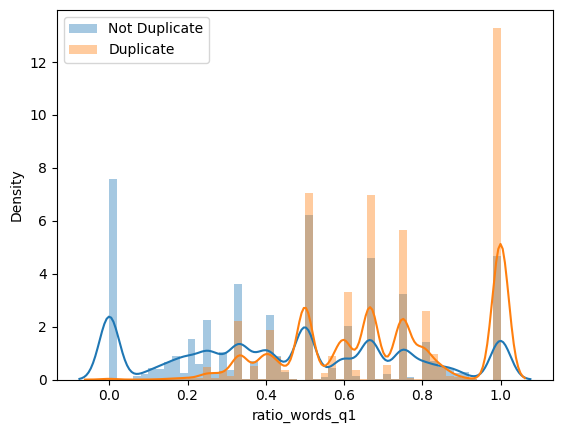

In [ ]:
#distribution plot of the ratio_words_q1 column based on is_duplicate
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df[df['is_duplicate'] == 0]['ratio_words_q1'], label='Not Duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['ratio_words_q1'], label='Duplicate')
plt.legend()
plt.show()

<ipython-input-39-8e45b84ffd4d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['full_ratio_words_q2'], label='Not Duplicate')
<ipython-input-39-8e45b84ffd4d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1]['full_ratio_words_q2'], label='

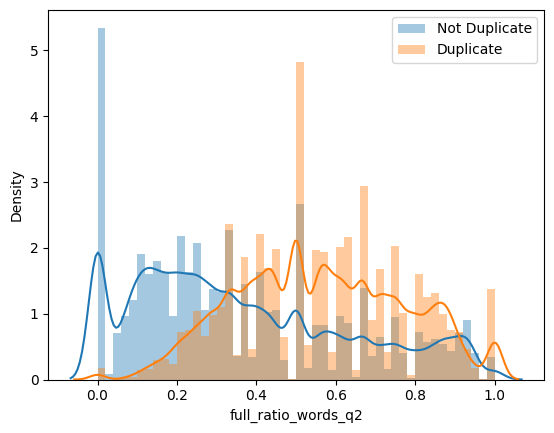

In [ ]:
#distribution plot of the ratio_words_q1 column based on is_duplicate
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df[df['is_duplicate'] == 0]['full_ratio_words_q2'], label='Not Duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['full_ratio_words_q2'], label='Duplicate')
plt.legend()
plt.show()

In [ ]:
# Create a column that contains the words that are in full_q1_not_q2 but not in q1_not_q2 AND the words that are in full_q2_not_q1 but not in q2_not_q1
df['stopwords1'] = df.apply(lambda row: row['full_q1_not_q2'].difference(row['q1_not_q2']), axis=1)
df['stopwords2'] = df.apply(lambda row: row['full_q2_not_q1'].difference(row['q2_not_q1']), axis=1)

# Create stopwords columns which is a concatenation of stopwords1 and stopwords2
df['stopwords'] = df['stopwords1'].map(str) + df['stopwords2'].map(str)

# Delete the two columns
df.drop(['stopwords1', 'stopwords2'], axis=1, inplace=True)

In [ ]:
# Create a binary column that will be 1 if full_q1_not_q2 or full_q2_not_q1 contain numbers and 0 if not
df['stopwords_contain_numbers'] = df.apply(lambda row: 1 if any(char.isdigit() for char in row['stopwords']) else 0, axis=1)

In [ ]:
# Sample of 5 where stopwords_contain_numbers is 1
df[df['stopwords_contain_numbers'] == 1].sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,ratio_words_q1,ratio_words_q2,full_ratio_words_q1,full_ratio_words_q2,q1_not_q2,q2_not_q1,full_q1_not_q2,full_q2_not_q1,q1_words,q2_words,stopwords,stopwords_contain_numbers
94595,94595,156033,157937,How should I approach someone who can install a 3g mobile tower on my land? What is the procedur...,How do I contact a mobile tower installation company for an installation in my land?,1,approach someone install mobile tower land procedure install vodafone,contact mobile tower installation company installation land,0.375000,0.500000,0.333333,0.500000,"{install, someone, procedure, vodafone, approach}","{installation, contact, company}","{to, install, who, What, is, someone, the, on, procedure, should, 3g, Vodafone,, approach, can}","{for, company, in, do, an, installation, contact}",22,15,"{'Vodafone,', 'to', 'who', 'What', 'is', 'the', 'should', '3g', 'on', 'can'}{'in', 'for', 'an', ...",1
138386,138386,220356,220357,What kind of jobs could I get with a 4-year degree in architecture?,What kind of jobs could I get with a 2-year degree in architecture?,0,kind job could get degree architecture,kind job could get degree architecture,1.000000,1.000000,0.923077,0.923077,{},{},{4-year},{2-year},13,13,{'4-year'}{'2-year'},1
366488,366488,11341,4044,How do I lose 20 kg in 2 months?,How can I lose weight quickly?,0,lose kg month,lose weight quickly,0.333333,0.333333,0.333333,0.500000,"{month, kg}","{quickly, weight}","{20, 2, do, in, months?, kg}","{quickly?, can, weight}",9,6,"{'20', '2', 'do', 'in', 'months?'}{'quickly?', 'can'}",1
143925,143925,227919,227920,"What will happen if Trump wins enough votes to win the electoral college, but electors jump ship...",What would happen if the electoral college voted for Hillary on Dec. 19th instead of Trump?,0,happen trump win enough vote win electoral college elector jump ship vote hillary,would happen electoral college voted hillary dec instead trump,0.454545,0.555556,0.285714,0.375000,"{jump, elector, ship, vote, win, enough}","{voted, dec, instead, would}","{Trump, to, jump, will, and, wins, electors, ship, but, votes, vote, Hillary?, win, enough, coll...","{Dec., Trump?, on, would, instead, 19th, voted, Hillary, college, of}",21,16,"{'Trump', 'to', 'will', 'and', 'wins', 'electors', 'but', 'votes', 'Hillary?', 'college,'}{'Dec....",1
366859,366859,497106,497107,"What's the best way to spend $2,000 on SEM for a lead generation campaign for a new investment p...",How do you invest in lead generation?,0,best way spend sem lead generation campaign new investment product,invest lead generation,0.200000,0.666667,0.058824,0.142857,"{campaign, best, investment, product, way, spend, sem, new}",{invest},"{SEM, to, for, campaign, best, What's, investment, the, generation, way, spend, $2,000, a, on, n...","{generation?, do, in, invest, How, you}",19,7,"{'SEM', 'to', 'for', ""What's"", 'the', 'generation', '$2,000', 'on', 'a', 'product?'}{'generation...",1


In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer #for BoW
#vect = CountVectorizer()

# Convenience function
# This function will apply a vectorizer to a series of text
# Will return a dataframe with the results of the vectorizer.
#def create_doc_term_matrix(text,vectorizer):
    #doc_term_matrix = vectorizer.fit_transform(text)
    #return pd.DataFrame(doc_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())



In [ ]:
# Use word2vec to see the cosine similarity between question 1 and question 2

# Import libraries
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Create a list of all words, we'll use question1_cleaned and question2_cleaned
all_words = df['question1_cleaned'].tolist() + df['question2_cleaned'].tolist()

# Tokenize the words
all_words_tokenized = [word_tokenize(word) for word in all_words]

# Create a word2vec model
model = Word2Vec(all_words_tokenized, min_count=1)

# Create a function that will create a vector for each question
def create_vector(question):
    vector = np.zeros(100)
    for word in question.split():
        vector += model.wv[word]
    return vector

# Create a column with the vector for question1
df['question1_vector'] = df.apply(lambda row: create_vector(row['question1_cleaned']), axis=1)

# Create a column with the vector for question2
df['question2_vector'] = df.apply(lambda row: create_vector(row['question2_cleaned']), axis=1)


In [ ]:
# Create a column with the cosine similarity between question1_vector and question2_vector
df['cosine_similarity'] = df.apply(lambda row: 1 - spatial.distance.cosine(row['question1_vector'], row['question2_vector']), axis=1)

/usr/local/lib/python3.9/dist-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'question1_cleaned', 'question2_cleaned', 'ratio_words_q1',
       'ratio_words_q2', 'full_ratio_words_q1', 'full_ratio_words_q2',
       'q1_not_q2', 'q2_not_q1', 'full_q1_not_q2', 'full_q2_not_q1',
       'q1_words', 'q2_words', 'stopwords', 'stopwords_contain_numbers',
       'question1_vector', 'question2_vector', 'cosine_similarity'],
      dtype='object')

In [ ]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,ratio_words_q1,ratio_words_q2,...,q2_not_q1,full_q1_not_q2,full_q2_not_q1,q1_words,q2_words,stopwords,stopwords_contain_numbers,question1_vector,question2_vector,cosine_similarity
0,0,1,2,What is the step by step guide to invest in share market in india,What is the step by step guide to invest in share market,0,step step guide invest share market india,step step guide invest share market,0.833333,1.00,...,{},{india},{},14,12,set()set(),0,"[1.5629367381334305, -4.429801754653454, -0.0415748655796051, -1.114059641957283, -0.24077069759...","[3.170061782002449, -3.5336892530322075, 0.6107922494411469, 0.3536253422498703, 1.4807226657867...",0.972169
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back,0,story kohinoor kohinoor diamond,would happen indian government stole kohinoor kohinoor diamond back,0.666667,0.25,...,"{happen, government, would, indian, stole, back}","{story, Diamond, is, of}","{Indian, diamond, happen, if, government, would, stole, back}",8,13,"{'Diamond', 'is', 'of'}{'Indian', 'if', 'diamond'}",0,"[-0.376870721578598, 0.8545531034469604, -0.24075673520565033, 0.6762119233608246, -0.2488368749...","[2.159793972969055, -0.7927706935442984, 4.853315077722073, -0.36384678818285465, 0.918758962303...",0.188891
2,2,5,6,How can I increase the speed of my internet connection while using a VPN,How can Internet speed be increased by hacking through DNS,0,increase speed internet connection using vpn,internet speed increased hacking dns,0.333333,0.40,...,"{increased, dns, hacking}","{increase, of, I, using, my, VPN, the, while, connection, a, internet}","{increased, Internet, through, hacking, by, be, DNS}",14,10,"{'I', 'of', 'my', 'VPN', 'the', 'while', 'a', 'internet'}{'Internet', 'through', 'by', 'be', 'DNS'}",0,"[0.33438099920749664, 4.357750318944454, -3.8792817890644073, -2.835099071264267, -0.10741064697...","[1.9483218900859356, 3.4851392060518265, -1.8087058067321777, 1.3937389440834522, -0.61842734366...",0.891879


In [ ]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# remove categorical columns and target
X = df.drop(['id', 'question1', 'question2', 'is_duplicate', 'question1_cleaned', 'question2_cleaned', 'q1_not_q2', 'q2_not_q1', 'full_q1_not_q2', 'full_q2_not_q1', 'stopwords', 'question1_vector', 'question2_vector'], axis=1)

# y as target
y = df['is_duplicate']
#X.head()

In [ ]:
#doing train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [ ]:
# define model instance
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

# Train the model with train data
rf.fit(X_train, y_train)

# validate the model with test data
y_pred1 = rf.predict(X_test)

# Print the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.7784387444656063


In [ ]:
# Same as above but with XGBoost

# Import libraries
from xgboost import XGBClassifier

# Set the model
xgb = XGBClassifier(n_estimators=100, max_depth=10, random_state=0)

# Train the model
xgb.fit(X_train, y_train)

# Predict the model
y_pred2 = xgb.predict(X_test)

# Print the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.7967424373593213


In [ ]:
#XGBoost by cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
xgb = XGBClassifier(n_estimators=100, max_depth=10, random_state=0)
pred2 = cross_val_predict(xgb, X, y, cv=5)
print(confusion_matrix(y, pred2))
print(accuracy_score(y, pred2))

[[162411  92613]
 [ 26250 123013]]
0.7059935145082578


In [ ]:
#second method
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(X_train, y_train)
y_pred3 = LGR.predict(X_test)

# Print the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred3))


0.6310569145910114


#### so the best model is XGBoost -----> ypred2

In [ ]:
# print confusion matrix for best model
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred2))

[[43281  7745]
 [ 8690 21142]]


In [ ]:
# print classification report for best model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     51026
           1       0.73      0.71      0.72     29832

    accuracy                           0.80     80858
   macro avg       0.78      0.78      0.78     80858
weighted avg       0.80      0.80      0.80     80858



In [ ]:
# train our model to whole data frame
df['prediction'] = xgb.predict(X)
print(accuracy_score(y, df['prediction']))
print(confusion_matrix(y, df['prediction']))



0.8364602374056054
[[224054  30970]
 [ 35147 114116]]


In [ ]:
# count the number of unique questions by consolidating question1 and question2
unique_questions = pd.concat([df['question1'], df['question2']]).unique()

print(len(unique_questions))

537359


Confusion Matrix:


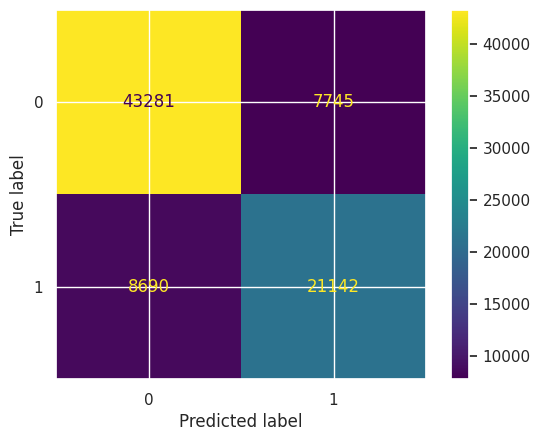

In [ ]:
#confusion matrix for best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('Confusion Matrix:');
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)


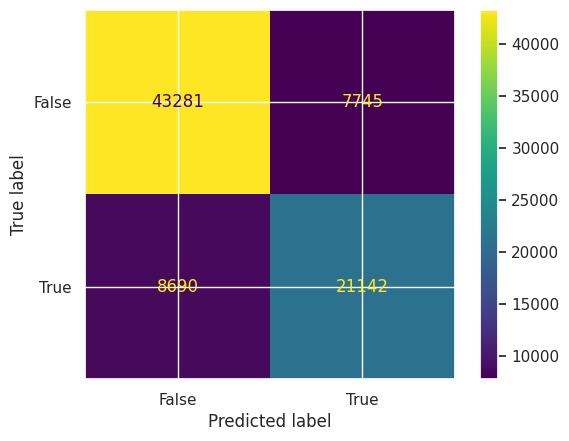

In [ ]:
#confusion matrix for best model----> second method
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred2, average='macro')

0.7802699384300684

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred2, average='macro')

0.7784583502863425